<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/trabalho_final/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão geral


Este notebook trata o conjunto de dados German Credit Data, disponível no site OpenML, que classifica o risco de crédito para pessoas a partir de um conjunto de atributos.

Estão contempladas as atividades de obtenção de dados, entendimento de dados, preparação de dados, modelagem e avaliação.


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from src.reports.metrics_collect import metrics_collect
from src.reports.metrics_log import metrics_log
from src.reports.confusion_matrix_display import confusion_matrix_display
from src.reports.metrics_plot import metrics_plot
from src.reports.cost_matrix_calc import cost_matrix_calc
from src.utils.load_config import load_config
from src.stages.data_load import data_load
from src.stages.data_split import data_split
from src.stages.feature_data import feature_data
from src.utils.train_model import train_model
from src.reports.confusion_matrix_display import ConfusionMatrixParams
from src.utils.train_model import TrainModelParams

In [2]:
%cd ..

/home/s676922906/projetos/mlops-poc-dvc


# Obtenção dos dados

In [3]:
data = data_load()
data.head()

2023-08-18 12:28:44,110 — DATA_LOAD — INFO — Get remote dataset
2023-08-18 12:28:44,154 — DATA_LOAD — INFO — Save local dataset


checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...   
2                       2         male single          none  ...   
3                       2         male single     guarantor  ...   
4                       3         male single          none  ...   

   property_magnitude age  other_payment_plans   housing existing_credits  \
0         real estate  67                 none       own                2   
1         real estate  22                 none       own                1   
2         real estate  49                 none       own                1   
3      life insurance  45                 none  for free                1   
4   no known property  53                 none  for free                2   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled              1            yes            yes  good  
1             skilled              1           none            yes   bad  
2  unskilled resident              2           none            yes  good  
3             skilled              2           none            yes  good  
4             skilled              2           none            yes   bad  

[5 rows x 21 columns]

# Preparação de dados

In [4]:
dataset = feature_data()
dataset.head()

2023-08-18 12:28:44,231 — FEATURE_DATA — INFO — Read local dataset
2023-08-18 12:28:44,244 — FEATURE_DATA — INFO — Rename target name
2023-08-18 12:28:44,246 — FEATURE_DATA — INFO — Extract features names
2023-08-18 12:28:44,250 — FEATURE_DATA — INFO — Encode target to numbers
2023-08-18 12:28:44,251 — FEATURE_DATA — INFO — Encode categorical features to numbers
2023-08-18 12:28:44,268 — FEATURE_DATA — INFO — Join categorical and numeric features
2023-08-18 12:28:44,270 — FEATURE_DATA — INFO — Join target to the dataset
2023-08-18 12:28:44,272 — FEATURE_DATA — INFO — Adjust features names
2023-08-18 12:28:44,273 — FEATURE_DATA — INFO — Save feature dataset


duration  credit_amount  installment_commitment  residence_since  age  \
0         6           1169                       4                4   67   
1        48           5951                       2                2   22   
2        12           2096                       2                3   49   
3        42           7882                       2                4   45   
4        24           4870                       3                4   53   

   existing_credits  num_dependents  checking_status_0<=X<200  \
0                 2               1                       0.0   
1                 1               1                       1.0   
2                 1               2                       0.0   
3                 1               2                       0.0   
4                 2               2                       0.0   

   checking_status_<0  checking_status_>=200  ...  housing_rent  \
0                 1.0                    0.0  ...           0.0   
1                 0.0                    0.0  ...           0.0   
2                 0.0                    0.0  ...           0.0   
3                 1.0                    0.0  ...           0.0   
4                 1.0                    0.0  ...           0.0   

   job_high qualif/self emp/mgmt  job_skilled  job_unemp/unskilled non res  \
0                            0.0          1.0                          0.0   
1                            0.0          1.0                          0.0   
2                            0.0          0.0                          0.0   
3                            0.0          1.0                          0.0   
4                            0.0          1.0                          0.0   

   job_unskilled resident  own_telephone_none  own_telephone_yes  \
0                     0.0                 0.0                1.0   
1                     0.0                 1.0                0.0   
2                     1.0                 1.0                0.0   
3                     0.0                 1.0                0.0   
4                     0.0                 1.0                0.0   

   foreign_worker_no  foreign_worker_yes  risk  
0                0.0                 1.0     1  
1                0.0                 1.0     0  
2                0.0                 1.0     1  
3                0.0                 1.0     1  
4                0.0                 1.0     0  

[5 rows x 62 columns]

## Data split

In [5]:
x_train, x_test, y_train, y_test = data_split()
x_train, x_test, y_train, y_test

2023-08-18 12:28:44,371 — DATA_SPLIT — INFO — Read features
2023-08-18 12:28:44,387 — DATA_SPLIT — INFO — (1000, 62)
2023-08-18 12:28:44,387 — DATA_SPLIT — INFO — Separate features and target
2023-08-18 12:28:44,390 — DATA_SPLIT — INFO — (1000, 61)
2023-08-18 12:28:44,390 — DATA_SPLIT — INFO — (1000,)
2023-08-18 12:28:44,391 — DATA_SPLIT — INFO — Normalize features
2023-08-18 12:28:44,399 — DATA_SPLIT — INFO — Split features into train and test sets
2023-08-18 12:28:44,402 — DATA_SPLIT — INFO — Save train and test sets


(array([[ 3.243815  ,  1.26349917,  0.02414692, ...,  1.21459768,
         -0.19601428,  0.19601428],
        [ 0.00804793, -0.33752154, -0.87018333, ..., -0.82331789,
         -0.19601428,  0.19601428],
        [-1.23647786, -0.72138371, -0.87018333, ..., -0.82331789,
         -0.19601428,  0.19601428],
        ...,
        [ 0.25695309,  0.89771361,  0.91847717, ..., -0.82331789,
         -0.19601428,  0.19601428],
        [-0.73866754, -0.63348175, -0.87018333, ...,  1.21459768,
         -0.19601428,  0.19601428],
        [-1.23647786, -0.82913449,  0.02414692, ..., -0.82331789,
         -0.19601428,  0.19601428]]),
 array([[-0.24085723, -0.02880136, -0.87018333, ..., -0.82331789,
         -0.19601428,  0.19601428],
        [-0.24085723,  0.39298625,  0.02414692, ...,  1.21459768,
         -0.19601428,  0.19601428],
        [ 0.25695309, -0.33539488, -0.87018333, ..., -0.82331789,
         -0.19601428,  0.19601428],
        ...,
        [ 0.25695309,  1.16850835, -0.87018333, ..., -

#4.Treinamento

## Definição de parâmetros para o GridSearchCV

In [6]:
config = load_config()
X_train = pd.read_csv(config["data"]["x_trainset_path"]).to_numpy()
y_train = np.ravel(pd.read_csv(config["data"]["y_trainset_path"]))
X_test = pd.read_csv(config["data"]["x_testset_path"]).to_numpy()
y_test = np.ravel(pd.read_csv(config["data"]["y_testset_path"]))


scoring=config['train']['grid_search_cv_params']['scoring']
cv=config['train']['grid_search_cv_params']['cv']
n_jobs=config['train']['grid_search_cv_params']['n_jobs']
grid_search_cv_params = {'scoring': scoring, 'cv': cv, 'n_jobs': n_jobs}

## Aplicação do método KNN

In [7]:
method = 'KNN'
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,9)}
params = TrainModelParams(model, params, grid_search_cv_params, X_train, y_train, X_test)
y_pred_knn = train_model(params)
metrics = metrics_collect(method, y_test, y_pred_knn)
metrics_log(config['evaluate']['metrics_file'], metrics)

## Aplicação do método LDA

In [8]:
method = 'LDA'
lda = LinearDiscriminantAnalysis()
y_pred_lda = lda.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_lda)
metrics_log(config['evaluate']['metrics_file'], metrics)

## Aplicação do método QDA

In [9]:
method = 'QDA'
qda = QuadraticDiscriminantAnalysis()
y_pred_qda = qda.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_qda)
metrics_log(config['evaluate']['metrics_file'], metrics)

/home/s676922906/projetos/mlops-poc-dvc/mlops-poc-dvc-env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Aplicação do método SVC

In [10]:
method = 'SVC'
model = SVC()
params = { 'kernel': ('linear', 'rbf'), 'C': [1,10], 'gamma': ('scale', 'auto') }
params = TrainModelParams(model, params, grid_search_cv_params, X_train, y_train, X_test)
y_pred_svc = train_model(params)
metrics = metrics_collect(method, y_test, y_pred_svc)
metrics_log(config['evaluate']['metrics_file'], metrics)

## Aplicação do método MLP

In [11]:
method = 'MLP'
model = MLPClassifier()
params = {'solver': ['lbfgs'], 'alpha': [0.0001, 0.0001], 'hidden_layer_sizes': [10,20], 'max_iter': [1000,1000]}
params = TrainModelParams(model, params, grid_search_cv_params, X_train, y_train, X_test)
y_pred_mlp = train_model(params)
metrics = metrics_collect(method, y_test, y_pred_mlp)
metrics_log(config['evaluate']['metrics_file'], metrics)

## Aplicação do método RFT

In [12]:
method = 'RFT'
model = RandomForestClassifier()
params = {'n_estimators': [200, 300], 'max_features': ['sqrt', 'log2'], 'max_depth': [None, 10] }
params = TrainModelParams(model, params, grid_search_cv_params, X_train, y_train, X_test)
y_pred_rft = train_model(params)
metrics = metrics_collect(method, y_test, y_pred_rft)
metrics_log(config['evaluate']['metrics_file'], metrics)

# Avaliações

## Métricas diversas

In [13]:
df = pd.read_json(config['evaluate']['metrics_file'],orient='records')
metrics_plot(df)

## Matriz de Confusão

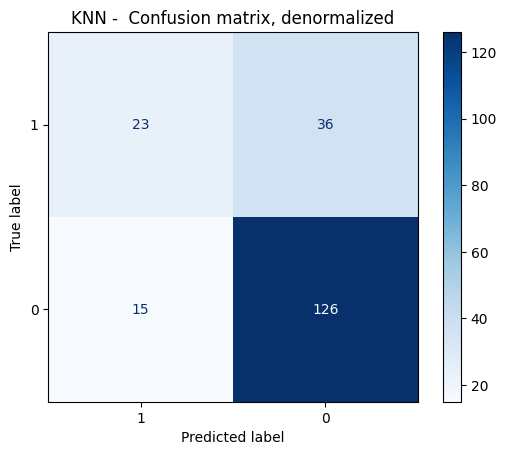

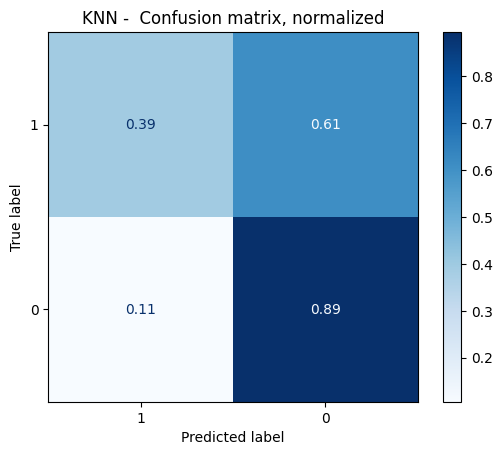

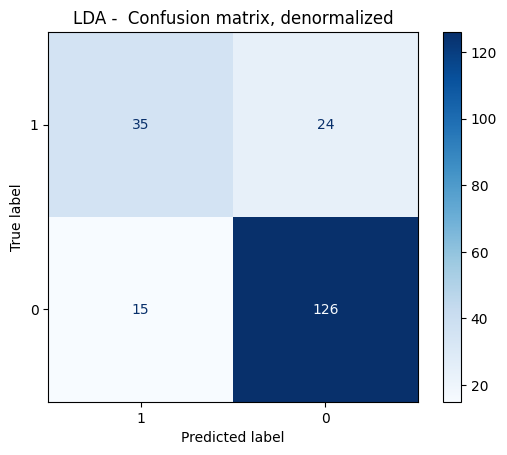

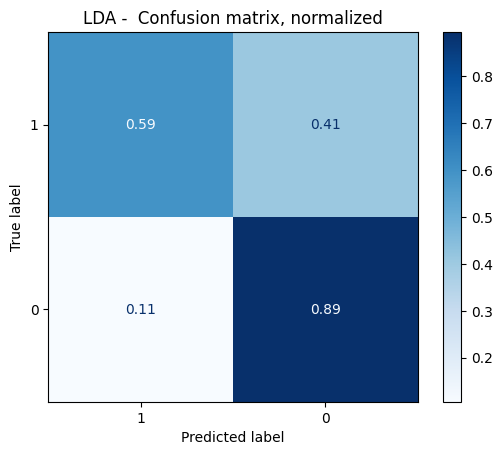

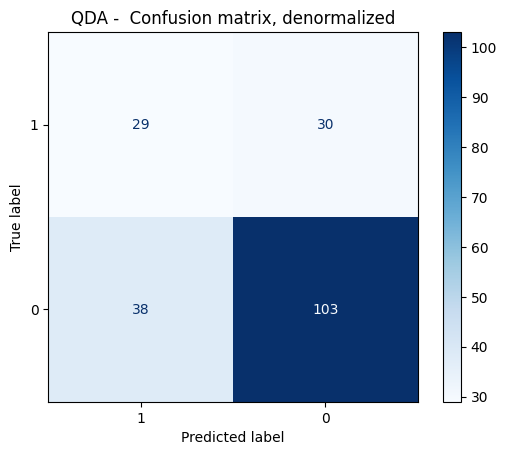

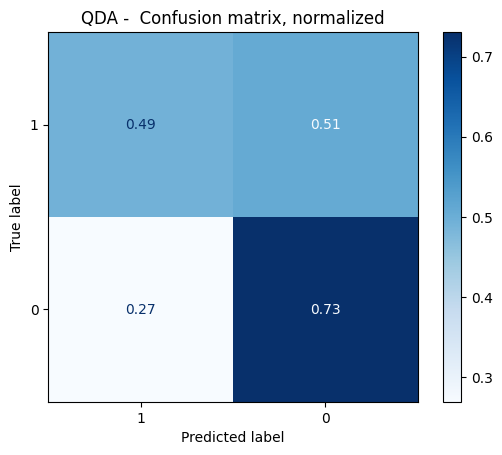

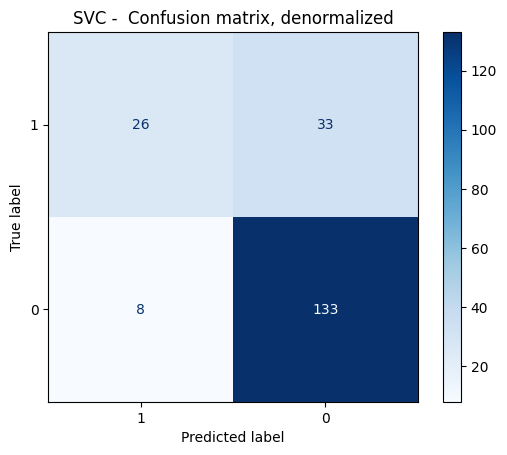

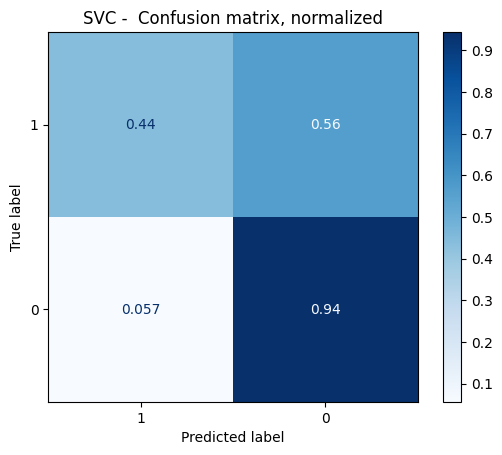

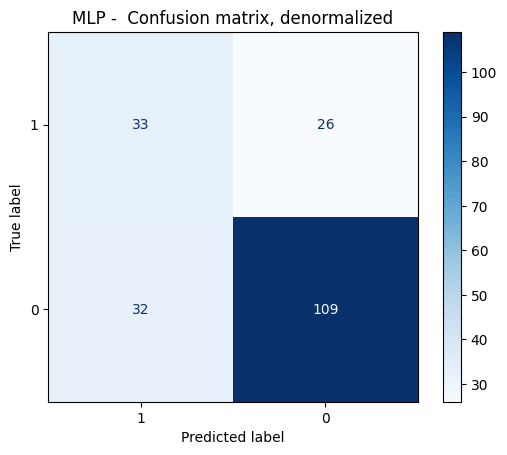

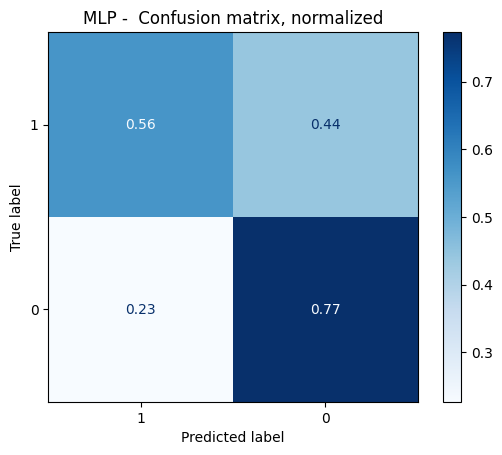

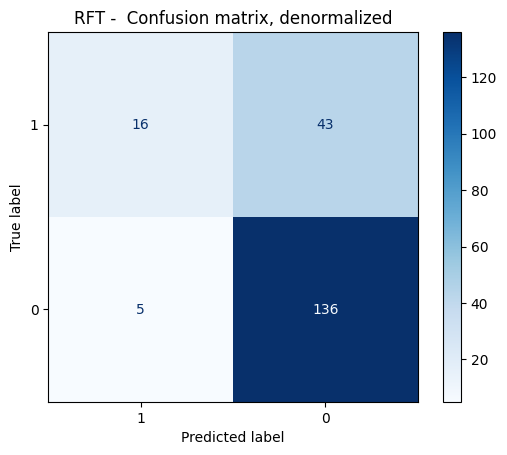

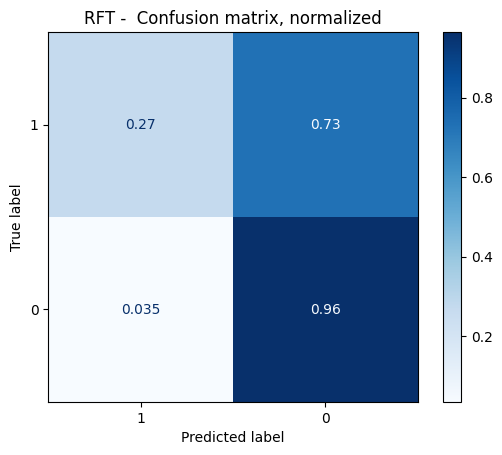

In [14]:
np.set_printoptions(precision=2)

class_names = dataset['risk'].unique()
color_map = plt.cm.Blues
options = [
    ("Confusion matrix, denormalized", None),
    ("Confusion matrix, normalized", "true"),
]
params
methods = [ ['KNN',  y_pred_knn ],
            ['LDA',  y_pred_lda ],
            ['QDA',  y_pred_qda ],
            ['SVC',  y_pred_svc ],
            ['MLP',  y_pred_mlp ],
            ['RFT',  y_pred_rft ] ]
for method, y_pred in methods:
  confusionMatrixParams = ConfusionMatrixParams(options, method, class_names, color_map)
  confusion_matrix_display(y_test, y_pred, confusionMatrixParams)

## Custos

In [15]:
# TODO: resolver gravação de array no json para calcular custo
# cost_matrix = [ [0, 1], [5, 0] ]
# cost_matrix_calc(df, cost_matrix)